# Examen Práctico 

#### 3670 COM:01-3900 | Ciencia de datos | 2024 C2

Alumnos: Martin Lecuona, Rojas Tomas, Alejo Agasi, Stefania Violi, Julian Castellana

## Enunciado

Se tiene un dataset con datos del historial de solicitantes a quienes se le otorgaron créditos y su situación final como deudores o pagadores. La entidad tiene que determinar a quienes entregar o no un crédito en función de su propensión a caer en "default". Desarrolle un proceso que clasifique deudores y pagadores. Observe que la clase de interés es "default", y debido a nuevas políticas de encaje bancario se ha expresado el objetivo de evitar tanto como sea posible entregar créditos a deudores (a costa naturalmente de perder algún posible crédito a pagadores). Maximice la métrica correspondiente sin modificar threshold.

 Las columnas tienen nombres descriptivos, pero para mas información:

Importe: Cuando dinero esta pidiendo prestado</BR>
añosPago: Tiempo para pagar el crédito</BR>
IngresoAnuales: Ingresos anuales del solicitante</BR>
RelacionIngresoDeuda: Ratio entre sus ingresos y la deuda</BR>
RelacionCuotaDeuda: Ratio entre sus ingresos y la cuota</BR>
PendienteEnTarjeta: Pendiente de pago en tarjetas de crédito</BR>
UsoCreditoTarjeta: Volumen de dinero que maneja con sus instrumentos de crédito</BR>
Objetivo: ¿Para que quiere el préstamos?</BR>
esPropietario: ¿Es propietario del su casa?</BR>
FueVeraz: ¿Alguna vez estuvo en el veraz?</BR>
TuvoEmbargo: ¿Tuvo algun embargo o situación judicial?</BR>
Cuentas: Cantidad de cuentas que maneja</BR>
PuntuacionGeneral: Puntuación crediticia otorgada por un organismo regular</BR>
Default: Si pagó o no el crédito</BR>
AntiguedadLaboral: Antiguedad laboral</BR>

## Como desarrollar el exámen

A partir del dataset realice todas las acciones para poder llegar al mejor modelo, explique brevemente en los fundamentos de sus transformaciones o acciones en general. 

La nota derivará de: </BR>
1.La calidad de la clasificación realizada</BR>
2.La fundamentación de los pasos realizados</BR>
3.Lo sencillo de llevar a producción el desarrollo</BR> 



Los docentes evaluaran su clasificador utilizando un conjunto de datos del dataset "fuera de la caja" (out of the box, al que usted no tiene acceso). Para minimizar la posible diferencia entre su medición y la medición del docente, recuerde y aplique conceptos de test, validación cruzada y evite los errores comunes de sesgo de selección y fuga de datos. Ej: "10. Common pitfalls and recommended practices" disponible en "https://scikit-learn.org/stable/common_pitfalls.html"   

Al final del notebook encontrará un bloque de código que lee la muestra adicional (a la que usted no tiene acceso) si EVALUACION==True, en caso contrario solo lee una submuestra del conjunto original para validar que el código funciona. Desarrolle el notebook como considere, para finalmente asignar el mejor clasificador que usted haya obtenido remplazando en f_clf = None, None por su clasificador. Implemente todas las transformaciones entre esa línea y la predición final (Evitando al fuga de datos).Puede dejar funcionando implementaciones alternativas que no prosperaron en notebooks separados. En cuanto comience con el desarrollo informe a los docentes el nombre del repositorio.


In [65]:
STUDENTDATAFILE = 'creditos_banco_alumnos.csv'
EVALDATAFILE    = 'creditos_banco_evaluacion.csv'
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np


In [66]:
df = pd.read_csv(STUDENTDATAFILE)
df.head()

,Importe,añosPago,IngresoAnuales,RelacionIngresoDeuda,RelacionCuotaDeuda,PendienteEnTarjeta,UsoCreditoTarjeta,Objetivo,esPropietario,FueVeraz,TuvoEmbargo,Cuentas,PuntuacionGeneral,Default,AntiguedadLaboral
0,2000,3,37000,6.29,2.22551,9663,96.6,Deuda,Hipoteca,0,0,2,4.4,paid off,2
1,28625,5,64000,15.34,14.07690,20084,60.3,Deuda renovable,Hipoteca,0,0,18,3.8,paid off,3
2,10400,3,76000,15.11,5.71753,4808,40.1,Deuda,Alquiler,0,1,8,4.4,paid off,7
3,33425,5,75000,20.85,14.08580,25807,60.7,Deuda,Hipoteca,0,1,14,4.0,paid off,11
4,15000,5,55000,7.66,9.43025,8452,49.4,Deuda,Alquiler,1,1,10,1.4,default,4


# Matriz de Correlación Variables Numéricas

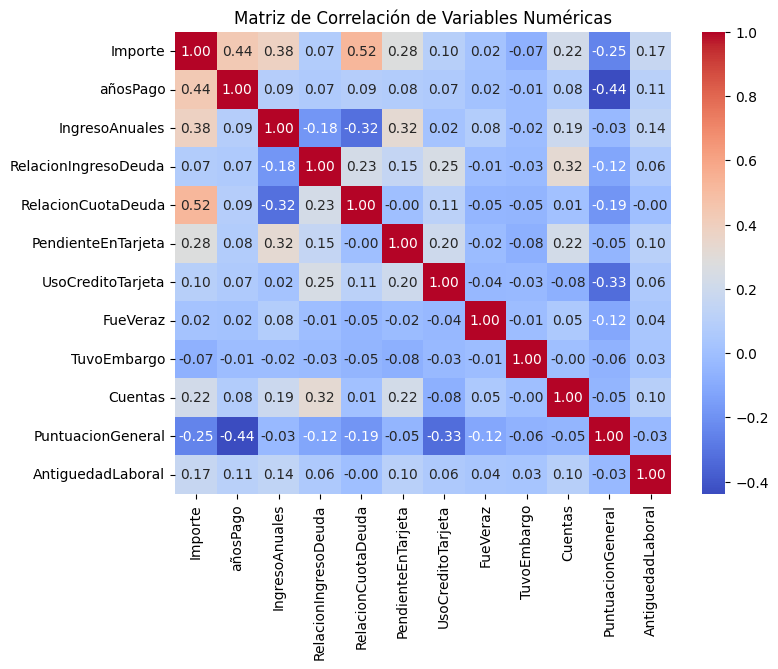

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlacion = df_numerico.corr()

# # Mostrar la matriz de correlación
# print(correlacion)

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()


Al analizar la matriz, podemos observar que las correlaciones más fuertes están en torno a 0.5 en valor absoluto, representando una correlación moderada. Es por ello que consideramos que no será necesario dropear ninguna de estas variables. (Esto fue debidamente probado y es por ello que se llegó a dicha conclusión))

# Etapa de preprocesamiento #
1. Verificamos valores nulos
2. Verificamos valores únicos
3. Utilizamos boxplot para encontrar posibles outliers
4. Eliminar outliers

#### Verificamos valores nulos

In [67]:
#Verificamos valores nulos
print(df.isnull().sum()/len(df)*100)
# No se encontraron valores nulos en las columnas, por lo tanto no imputamos

Importe                 0.0
añosPago                0.0
IngresoAnuales          0.0
RelacionIngresoDeuda    0.0
RelacionCuotaDeuda      0.0
PendienteEnTarjeta      0.0
UsoCreditoTarjeta       0.0
Objetivo                0.0
esPropietario           0.0
FueVeraz                0.0
TuvoEmbargo             0.0
Cuentas                 0.0
PuntuacionGeneral       0.0
Default                 0.0
AntiguedadLaboral       0.0
dtype: float64


#### Verificamos valores únicos

In [ ]:

# Resumen de estadísticas
print("\nResumen de estadísticas numéricas:")
print(df.describe())
print("\nResumen de estadísticas categóricas:")
print(df.describe(include=['object']))


Resumen de estadísticas numéricas:
            Importe      añosPago  IngresoAnuales  RelacionIngresoDeuda  \
count  34006.000000  34006.000000    3.400600e+04          34006.000000   
mean   13172.604099      3.503441    6.813686e+04             16.110743   
std     8101.327372      0.868015    4.549577e+04              7.593360   
min      500.000000      3.000000    3.500000e+03              0.000000   
25%     7000.000000      3.000000    4.200000e+04             10.460000   
50%    11500.000000      3.000000    6.000000e+04             16.010000   
75%    18000.000000      5.000000    8.200000e+04             21.560000   
max    35000.000000      5.000000    1.200000e+06             38.600000   

       RelacionCuotaDeuda  PendienteEnTarjeta  UsoCreditoTarjeta  \
count        34006.000000        3.400600e+04       34006.000000   
mean             8.026282        1.497325e+04          56.087961   
std              4.267497        2.108654e+04          25.437684   
min             

#### Analizamos posibles outliers con Boxplot

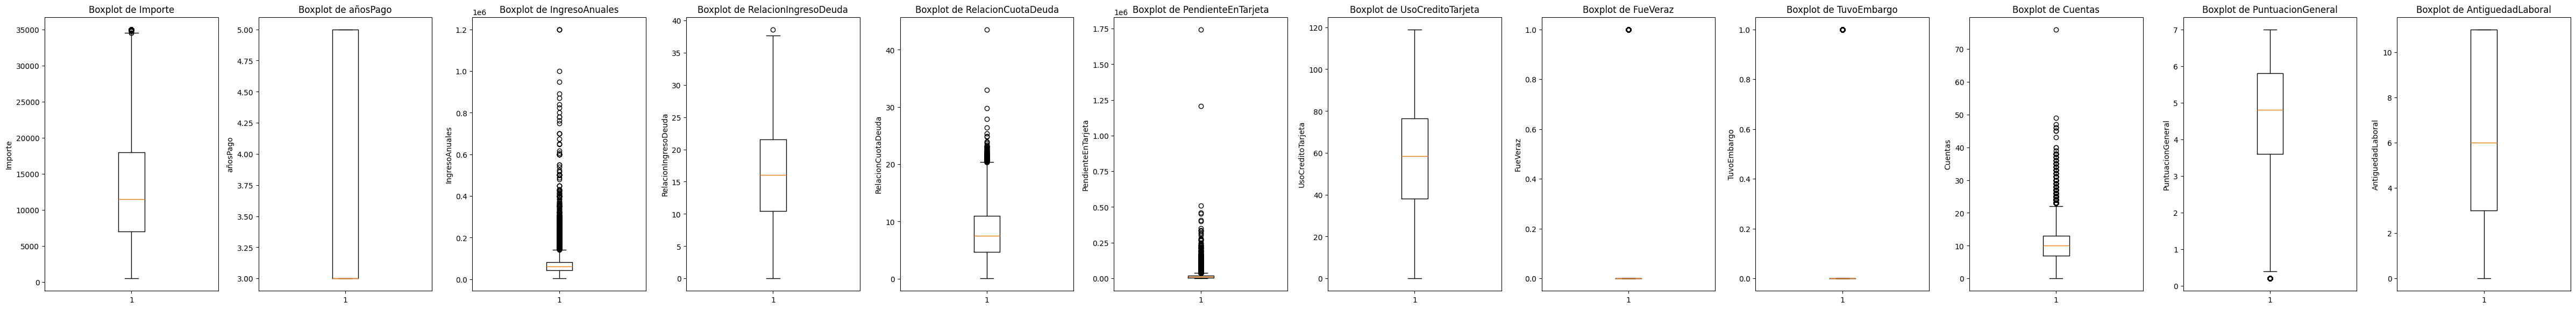

In [69]:
#Obtenemos únicamente las columnas que sean del tipo numéricas
numeric_columns = df.select_dtypes(include=np.number).columns

# Número de columnas numéricas
n = len(numeric_columns)  

# Ajustar el tamaño
plt.figure(figsize=(4 * n, 6))  


for i, column in enumerate(numeric_columns):
    plt.subplot(1, n, i + 1) 
    plt.boxplot(df[column].dropna())  # Evitar NaN en el boxplot 
    plt.title(f'Boxplot de {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

#### Detectamos outliers, por lo que se los convertirá en nulos para luego imputarlos

In [70]:
# Seleccionamos columnas numéricas y eliminamos las binarias
numeric_columns = [col for col in df.select_dtypes(include=np.number).columns if col not in ["FueVeraz", "TuvoEmbargo"]]

# Mostrar las columnas restantes
print(numeric_columns)

['Importe', 'añosPago', 'IngresoAnuales', 'RelacionIngresoDeuda', 'RelacionCuotaDeuda', 'PendienteEnTarjeta', 'UsoCreditoTarjeta', 'Cuentas', 'PuntuacionGeneral', 'AntiguedadLaboral']


In [71]:
# Función para identificar outliers usando el rango intercuartílico (IQR)
def reemplazar_outliers_por_nulos(df, columnas):
    for columna in columnas:
        # Calcula el IQR (Q3 - Q1)
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Reemplaza los outliers por NaN
        df[columna] = df[columna].apply(lambda x: np.nan if (x < limite_inferior or x > limite_superior) else x)

# Reemplazar outliers en las columnas especificadas
reemplazar_outliers_por_nulos(df, numeric_columns)

In [72]:
#Verificamos valores nulos
print(df.isnull().sum()/len(df)*100)

Importe                 2.746574
añosPago                0.000000
IngresoAnuales          4.569782
RelacionIngresoDeuda    0.002941
RelacionCuotaDeuda      0.344057
PendienteEnTarjeta      5.234370
UsoCreditoTarjeta       0.000000
Objetivo                0.000000
esPropietario           0.000000
FueVeraz                0.000000
TuvoEmbargo             0.000000
Cuentas                 1.884961
PuntuacionGeneral       0.432277
Default                 0.000000
AntiguedadLaboral       0.000000
dtype: float64


In [73]:
# Filtrar las filas que tienen al menos un valor nulo
filas_con_nulos = df[df.isnull().any(axis=1)]

# Mostrar las filas que tienen valores nulos
print(filas_con_nulos)

       Importe  añosPago  IngresoAnuales  RelacionIngresoDeuda  \
6      19200.0         3             NaN                  3.78   
13     16000.0         3         35000.0                 20.33   
15     33000.0         5             NaN                 17.31   
18     30000.0         3             NaN                  1.15   
26      9750.0         3             NaN                 14.43   
...        ...       ...             ...                   ...   
33987  20000.0         3         95678.0                 16.64   
33994  28000.0         5             NaN                 13.39   
33999  10500.0         3         55000.0                 24.40   
34002   4800.0         5         40000.0                 21.14   
34004  20000.0         3             NaN                  6.73   

       RelacionCuotaDeuda  PendienteEnTarjeta  UsoCreditoTarjeta  \
6                 3.93894             32027.0               67.9   
13               17.41920             14896.0               25.6   
15 

#### Volvemos a ver el Boxplot

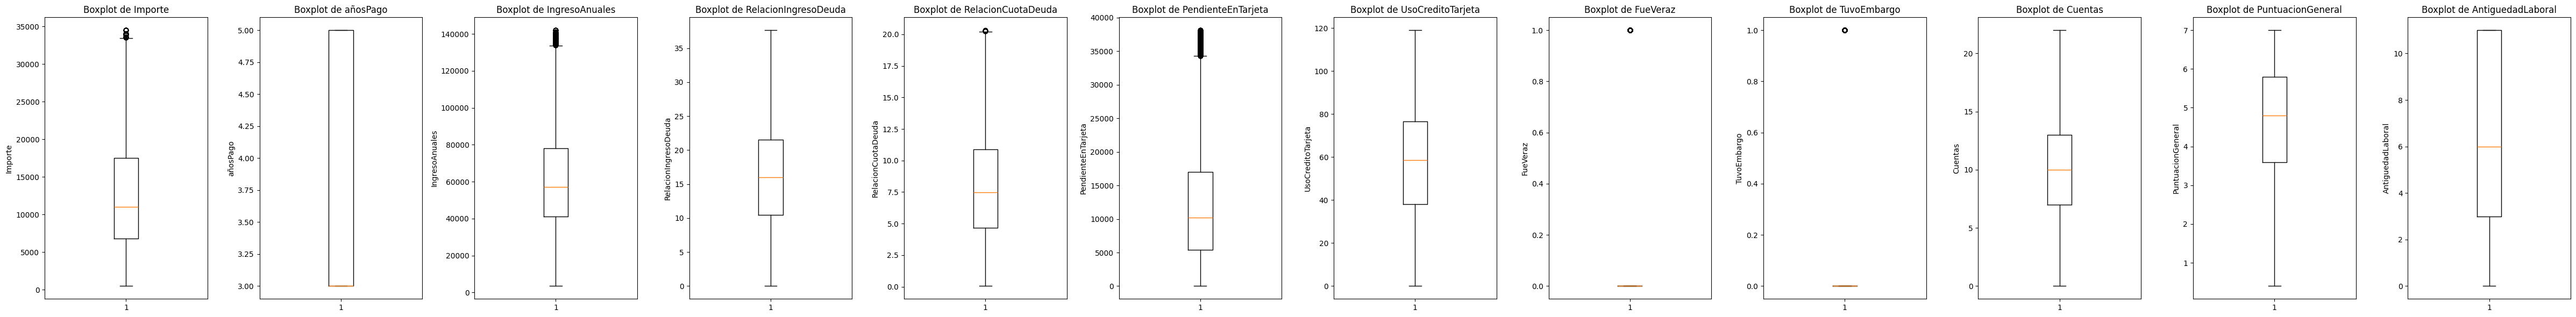

In [74]:
#Obtenemos únicamente las columnas que sean del tipo numéricas
numeric_columns = df.select_dtypes(include=np.number).columns

# Número de columnas numéricas
n = len(numeric_columns)  

# Ajustar el tamaño
plt.figure(figsize=(4 * n, 6))  


for i, column in enumerate(numeric_columns):
    plt.subplot(1, n, i + 1) 
    plt.boxplot(df[column].dropna())  # Evitar NaN en el boxplot 
    plt.title(f'Boxplot de {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


#### Se visualizan los datos con una distribución más equilibrada

## Balanceo de variable objetivo "Default"

In [75]:
print(df['Default'].unique())

['paid off' 'default']


In [76]:
balance_counts = df['Default'].value_counts()

# Mostrar los conteos absolutos
print("Conteos de cada clase:")
print(balance_counts)

balance_proportions = df['Default'].value_counts(normalize=True)
print("\nProporciones de cada clase:")
print(balance_proportions)

Conteos de cada clase:
Default
paid off    17003
default     17003
Name: count, dtype: int64

Proporciones de cada clase:
Default
paid off    0.5
default     0.5
Name: proportion, dtype: float64


#### Se puede ver que se encuentra balanceada la variable objetivo

# Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Default'], axis=1)
y = df['Default']

df = X

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y ,test_size=0.2, random_state=42)

# Column Transformer (dentro de Pipeline)

Primero armamos un pipeline para features numericas y otro para features categoricas, que contendran las transformaciones correspondientes como imputaciones y normalizaciones. Luego estos pipelines se agruparan en un column transformer

In [ ]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import OneHotEncoder

numerical_features = df.select_dtypes(include=np.number).columns
categorical_features = df.select_dtypes(exclude=np.number).columns

print(numerical_features)
print("----------")
print(categorical_features)


numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')) 
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

Index(['Importe', 'añosPago', 'IngresoAnuales', 'RelacionIngresoDeuda',
       'RelacionCuotaDeuda', 'PendienteEnTarjeta', 'UsoCreditoTarjeta',
       'FueVeraz', 'TuvoEmbargo', 'Cuentas', 'PuntuacionGeneral',
       'AntiguedadLaboral'],
      dtype='object')
----------
Index(['Objetivo', 'esPropietario'], dtype='object')


Ese column transformer se integrara al pipeline definitivo con su correspondiente clasificador

# PIPELINES KNN Y RANDOM FOREST

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42,class_weight="balanced"))
])

In [80]:
from sklearn.model_selection import cross_val_score

print("KNN")
scores_knn = cross_val_score(pipeline_knn, X_train, y_train, cv=5, scoring='accuracy')
print("Puntuaciones en cada fold:", scores_knn)
print("Precisión promedio con validación cruzada:", scores_knn.mean())

# Entrenamos el modelo
pipeline_knn.fit(X_train, y_train)
y_pred_knn = pipeline_knn.predict(X_test)

#############################################

print("RANDOM FOREST")
scores_rf = cross_val_score(pipeline_rf, X_train, y_train, cv=5, scoring='accuracy')
print("Puntuaciones en cada fold:", scores_rf)
print("Precisión promedio con validación cruzada:", scores_rf.mean())

pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)

KNN
Puntuaciones en cada fold: [0.58261349 0.58867855 0.59603014 0.58316486 0.60018382]
Precisión promedio con validación cruzada: 0.5901341732704843
RANDOM FOREST
Puntuaciones en cada fold: [0.64326411 0.63425841 0.63242051 0.6272744  0.64338235]
Precisión promedio con validación cruzada: 0.6361199552417917


# Pipeline Mejor Knn

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

pipeline_knn_best = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11, 15, 20], 
    'classifier__weights': ['uniform', 'distance'],        
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski']  
}


# Configuramos GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline_knn_best,
    param_grid=param_grid,
    cv=5,               # Validación cruzada con 5 folds
    scoring='accuracy',  # Métrica de evaluación
    n_jobs=-1            # Usar todos los núcleos disponibles
)

grid_search.fit(X_train, y_train)
y_pred_knn_best= grid_search.predict(X_test)
pipeline_knn_best = grid_search.best_estimator_

print("\nKNN - Mejor Estimador:")
pipeline_knn_best

c:\Users\alejo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [0.58039294 0.58083407 0.59013417 0.58954603 0.59770653 0.5979271
 0.60413945 0.60358808 0.60652885 0.60590393 0.61288801 0.61406432
 0.61862256 0.6172257         nan 0.58351727        nan 0.59568471
        nan 0.6013087         nan 0.60612406        nan 0.60689601
        nan 0.61457857        nan 0.62193064 0.58039294 0.58083407
 0.59013417 0.58954603 0.59770653 0.5979271  0.60413945 0.60358808
 0.60652885 0.60590393 0.61288801 0.61406432 0.61862256 0.6172257 ]
  warnings.warn(



KNN - Mejor Estimador:


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Importe', 'añosPago', 'IngresoAnuales', 'RelacionIngresoDeuda',
       'RelacionCuotaDeuda', 'PendienteEnTarjeta', 'UsoCreditoTarjeta',
       'FueVeraz', 'TuvoEmbargo', 'Cuentas', 'PuntuacionGeneral',
       'AntiguedadLaboral'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Objetivo', 'esPropietario'], dtype='object'))])),
                ('classifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=20,
                                      weights='distance'))])

# Pipeline Mejor Random Forest

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

pipeline_rf_best = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight="balanced"))
])

# Definir la cuadrícula de parámetros sin 'log_loss' y sin n_estimators en el clasificador inicial
param_grid_rf = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [3, 4, 5, 6, 7, 8],
    'classifier__min_samples_split': [2, 4, 8, 10, 12, 14],
    'classifier__min_samples_leaf': [2, 4, 6, 8, 10],
    'classifier__max_features': ["sqrt", "log2", None],
    'classifier__n_estimators': [30, 60, 90, 120, 150, 180]
}


rand_search = RandomizedSearchCV(
    estimator=pipeline_rf_best,
    param_distributions=param_grid_rf,  
    n_iter=50,  
    cv=5,               
    scoring='accuracy', 
    random_state=42,     
    n_jobs=-1            
)

rand_search.fit(X_train, y_train)
y_pred_rf_best = rand_search.predict(X_test)  
pipeline_rf_best = rand_search.best_estimator_

print("\nRandom Forest - Mejor Estimador:")
pipeline_rf_best



Random Forest - Mejor Estimador:


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Importe', 'añosPago', 'IngresoAnuales', 'RelacionIngresoDeuda',
       'RelacionCuotaDeuda', 'PendienteEnTarjeta', 'UsoCreditoTarjeta',
       'FueVeraz', 'TuvoEmbargo', 'Cuentas', 'PuntuacionGeneral',
       'AntiguedadLaboral'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Objetivo', 'esPropietario'], dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=8,
                                        max_features='log2', min_samples_leaf=4,
                                        n_estimators=120, random_state=42))])

## Métricas Obtenidas

In [83]:
from sklearn.metrics import classification_report

print("KNN")
print(classification_report(y_test, y_pred_knn))

print("RANDOM FOREST")
print(classification_report(y_test, y_pred_rf))

print("MEJOR KNN")
print(classification_report(y_test, y_pred_knn_best))

print("MEJOR RANDOM FOREST")
print(classification_report(y_test, y_pred_rf_best))


KNN
              precision    recall  f1-score   support

     default       0.59      0.56      0.57      3401
    paid off       0.58      0.61      0.59      3401

    accuracy                           0.58      6802
   macro avg       0.58      0.58      0.58      6802
weighted avg       0.58      0.58      0.58      6802

RANDOM FOREST
              precision    recall  f1-score   support

     default       0.63      0.66      0.64      3401
    paid off       0.64      0.61      0.63      3401

    accuracy                           0.64      6802
   macro avg       0.64      0.64      0.64      6802
weighted avg       0.64      0.64      0.64      6802

MEJOR KNN
              precision    recall  f1-score   support

     default       0.62      0.58      0.60      3401
    paid off       0.61      0.65      0.63      3401

    accuracy                           0.62      6802
   macro avg       0.62      0.62      0.61      6802
weighted avg       0.62      0.62      0.61   

# Testing Final

In [84]:
EVALUACION = False
best_clf = pipeline_rf_best #Asignar aqui el mejor clasificador posible (previamente entrenado)

#Leemos el dataset de evaluación, simulando producción
if EVALUACION==False:
    df = pd.read_csv(STUDENTDATAFILE)
    _, df = train_test_split(df, test_size=0.3, random_state=42)
else:
    df = pd.read_csv(EVALDATAFILE)
#Dividimos en target y predictoras

X_Eval = df.drop("Default", axis=1)
y_Eval = df["Default"]

#Evaluación final
y_pred = best_clf.predict(X_Eval) # esto debe ser un pipeline completo
print(classification_report(y_Eval, y_pred))

              precision    recall  f1-score   support

     default       0.66      0.68      0.67      5133
    paid off       0.67      0.65      0.66      5069

    accuracy                           0.67     10202
   macro avg       0.67      0.67      0.67     10202
weighted avg       0.67      0.67      0.67     10202

